<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_131_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 131: ARIMA V - Grid Search ARIMA

---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|ARIMA V - Grid Search ARIMA|
|||
|**Class Description**|In this class, a student will determine optimal hyperparameter values for ARIMA model using Grid search technique|
|||
|**Class**|C131|
|||
|**Class Time**|55 minutes|
|||
|**Goal**|Evaluate model using other accuracy metrics|
||Estimate Hyperparameter values using Grid search|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

#### Teacher-Student Activities

In previous lessons, we explored moving average processes MA(q), and autoregressive processes AR(p). We combined them and formed ARMA(p, q) and ARIMA(p, d, q) models to deploy more complex time series.

Thus, the step by step approach of performing time series forecasting using ARIMA are as shown below:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/26b7c5ae-6652-4bd1-826d-abd6a51d5987.jpg" height = 350/></center>

In today's class, we will deploy ARIMA model on a seasonal real world dataset and determine optimal hyperparameter values for ARIMA using Grid search technique.

Let us first recall the concepts covered in the previous lesson and start this lesson from **Activity 1: Deploying ARIMA**.

---

#### Understanding Moving Average (MA) Models

Recall the simple AR model:
$$y_t = \phi_0 + \phi_1 y_{t-1} + \epsilon_t $$

Here, errors ($\epsilon_t$) is the residual error at time $t$.

However, just like the input observations, there may be autocorrelation or dependency between the residual errors. We may consider situations in which the error at one specific time is linearly related to the error at a previous time.  Hence, we can
create a model of the residual error time series and predict the expected error for our model.

A simple and effective model of residual error is an autoregression **Moving Average (MA)** model. This model uses past prediction errors instead of past observations to predict future values.

The simple MA model is given as:
$$y_t = \theta_0 + \theta_1 \epsilon_{t-1} + \epsilon_t \tag{1.1}$$

Where,
- $\theta_0$ is the constant or intercept (same as $\phi_0$ of AR model).
- $\theta_1$ is the regression coefficient for lag-1 error.
- $\epsilon_{t-1}$ is the residuals or error in prediction for the past period.
-  $\epsilon_{t}$ is the residuals for the current period.

Thus, MA models use dependency between residual errors to forecast values in the next time period.

The equation (1.1) is a first-order moving average **MA(1)** model as the one error term is used to predict the target variable.

Compare the AR(1) and MA(1) model equations:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/9abcbcf2-318f-421a-853d-db79132b9059.png"/>

The only difference in both the regression models is that the AR uses *lagged observations* whereas MA uses *lagged residual errors* to perform forecasting.

Similarly, the second-order moving average denoted by **MA(2)** is:

$$y_t = \theta_0 + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t \tag{4.2}$$

More generally, the MA process of order `q` is defined as:


$$y_t = \theta_0 + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots+ \theta_q \epsilon_{t-q} + \epsilon_t \tag{4.3}$$

The order `q` of the moving average model determines the number of past error terms that affect the present value.  The larger `q` means the more past error terms affect the present value. Therefore, it is important to determine the order `q` of the moving average process in order to fit the appropriate model.

We will understand how to identify the order of a MA process in the upcoming section. Before that, let us understand ARMA models.





---

#### Recap

#### Understanding Autoregressive Moving Average (ARMA) Models

Combining the concepts of the AR model and MA model, the ARMA model has been developed. The ARMA model combines the AR and MA models as shown below:


$$y_t = \phi_0 + \underbrace{\phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p}}_{\text{lagged values}}  + \underbrace{\theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots+ \theta_q \epsilon_{t-q} + \epsilon_t}_{\text{lagged errors}}$$

Here,
 - $p$ is the order of AR model.
 - $q$ is the order of MA model.

**The main notion of combining the concepts of the AR(p) model and the MA(p) model in the ARMA(p, q) model is to equally consider both the lagged values and lagged error values.**

By combining the concepts of both the models, the ARMA is expected to give much better results than
the individual two models. Thus, if we consider the ARMA(1,1) model, the equation can be written as:

$$y_t = \phi_0 + \phi_1 y_{t-1}  + \theta_1 \epsilon_{t-1} + \epsilon_t$$

This shows the basic calculation of the ARMA model that can be used to predict future trends.

Suppose, we want to find how much quantity of a  particular product should be manufactured by a company in this current month i.e $y_t$.
In this case, the ARMA(1,1) model will check:
- How many products were required to be manufactured in the previous month ($y_{t–1}$).
- How much error was involved in predicting the number of products required for the last month ($\epsilon_{t-1}$).
- How much error or random noise was involved in the prediction of the number for the current month ($\epsilon_{t}$).

**Autoregressive Integrated Moving Average Model (ARIMA(p,d,q)):**

When we combine differencing with ARMA model to make  time series data stationary, an ARIMA model is obtained. This model has three parameters:
- `p` is the order of AR model.
- `q` is the order of MA model.
- `d` is the order of differencing.

Thus, ARIMA(p,d,q) model is given by:

$$y'_t = \phi_0 + \underbrace{\phi_1 y'_{t-1} + \phi_2 y'_{t-2} + \dots + \phi_p y'_{t-p}}_{\text{differenced lagged values}}  + \underbrace{\theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots+ \theta_q \epsilon_{t-q}}_{\text{lagged errors}} + \epsilon_t$$

Here, $y'_t, y'_{t-1}, y'_{t-2}, \dots, y'_{t-p}$ are the differenced series terms.

Now, the main challenge is to determine the order values chosen for the ARIMA model. We already understood how to estimate order `d` value in the previous class. Let us now learn how to estimate `p` and `q` order value of AR and MA models.

---

#### ARIMA in Action

Here, we will recap on how to work on ACF and PACF of the timeseries and determing `p`, `d`, and `q` parameters.

In [ ]:
# Load the time series data and print first 5 rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

file_path = 'https://s3-whjr-curriculum-uploads.whjr.online/f4cfc0d1-c1a6-4c4d-bd1c-2388821b7c90.xlsx'
gadgets_df = pd.read_excel(file_path)
gadgets_df.head()

,Days,Sales
0,2019-01-01,50.496714
1,2019-01-02,50.805493
2,2019-01-03,51.477758
3,2019-01-04,53.542228
4,2019-01-05,54.873108


In [ ]:
# Get the total number of rows and columns, missing values (if any), data types of columns in the dataset.
gadgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Days    500 non-null    datetime64[ns]
 1   Sales   500 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


There are 500 rows and 2 columns and no missing values in the dataset. Also, the data type of the `Days` column is `datetime` which is exactly what we need.  
Let us set this column as index of the DataFrame using `set_index()` function. Store this indexed DataFrame as a separate DataFrame.

In [ ]:
# Set 'Days' column as index of the DataFrame.
gadgets_in_df = gadgets_df.set_index('Days')
gadgets_in_df.head()

,Sales
Days,
2019-01-01,50.496714
2019-01-02,50.805493
2019-01-03,51.477758
2019-01-04,53.542228
2019-01-05,54.873108


We got a DataFrame with `Days` as index in the DataFrame.

Let us create a line plot to visualise the day-wise indexed DataFrame.

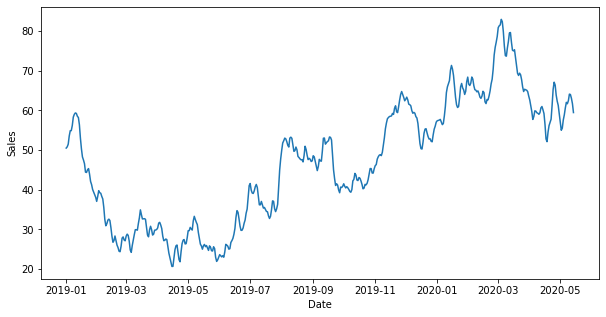

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(gadgets_in_df)
plt.show()

In [ ]:
# Implement ADF test.
# Import 'adfuller' from 'sklearn.tsa.stattools'
from statsmodels.tsa.stattools import adfuller

# Get the results of Dickey Fuller Test using 'adfuller()' function
print('Results of Dickey Fuller Test:')
adf_df1 = adfuller(gadgets_in_df['Sales'])

# Print the ADF Statistic results from the first index of ADF Test results
print('ADF Statistic:', adf_df1[0])

# Print the p-value from the second index of ADF Test results
print('p-value: ', adf_df1[1])

Results of Dickey Fuller Test:
ADF Statistic: -1.5121662069359079
p-value:  0.5274845352272589


You may observe that the ADF statistic is not a large negative number and the p-value is greater than 0.05. Therefore, our time series is not stationary and we must apply transformations to make it stationary.

In order to make our series stationary, we will try to stabilise the trend by applying a first-order differencing. In the previous lessons, we implemented following formula in Python to perform first order differencing:

$$y'_t = y_t - y_{t-1}$$

Here, the previous time lag $y_{t-1}$ was calculated using `shift(1)` function.

Another way of performing first-order differencing is to use `diff(1)` function of DataFrame.

In [ ]:
# Use 'diff(1)' function to perform first-order differencing
gadgets_diff1 = gadgets_in_df.diff(1)
gadgets_diff1

,Sales
Days,
2019-01-01,NaN
2019-01-02,0.308778
2019-01-03,0.672265
2019-01-04,2.064470
2019-01-05,1.330880
...,...
2020-05-10,1.651336
2020-05-11,-0.095290
2020-05-12,-0.962187


In [ ]:
# Remove NaN values and check stationarity of the time series data
gadgets_diff1.dropna(inplace = True)

# Get the results of Dickey Fuller Test using 'adfuller()' function
adf_df2 = adfuller(gadgets_diff1['Sales'])

# Print the ADF Statistic results from the first index of ADF Test results
print('ADF Statistic:', adf_df2[0])

# Print the p-value from the second index of ADF Test results
print('p-value: ', adf_df2[1])

ADF Statistic: -10.576657780341957
p-value:  7.076922818587346e-19


---

#### Picking Parameters for ARIMA (p,d,q)

We already know how many times we had to difference the dataset, so here the value of hyperparameter `d` is `1`.

Next, we need to figure out the values of `p` and `q`.

Remember the following rule: <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/>

- To estimate order `p`, PACF plot is used.
- To estimate order `q`, ACF plot is used.

**Determining order `p`:**

In the previous lesson, we learned how to estimate order `p` using PACF plot. Let us first create a PACF plot for first-order differenced time-series.

**Note:** You may pass `lags = 10` inside `plot_pacf()` function to plot PACF only for first 10 lags, as higher order lags are anyway bad choice for `p`.

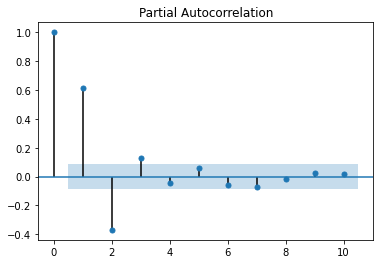

In [ ]:
# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gadgets_diff1, lags = 10)
plt.show()

The PACF at $\text{lag} = 0$ is 1, because each data point is always correlated with itself. Analysing the PACF plot,  we can see there are significant spikes at lag 1, lag 2 and lag 3. Hence, order `p` can be `1`, `2` or `3`. We will pick `p = 2`.

**Note:** You may also pick other significant `p` values and compare the model's performance for both different `p` values. However, avoid using higher `p` values to keep the model as simple as possible.

**Determining order `q`:**

Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms i.e value of order `q`.

Let us create an ACF plot for first-order differenced time-series.


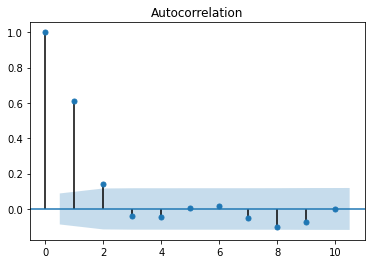

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gadgets_diff1, lags = 10)
plt.show()

Again the ACF at $\text{lag} = 0$ is 1, because each data point is always correlated with itself. Analysing the ACF plot,  we can see there are significant spikes at lag 1 and lag 2. Hence, order `q` can be `1` or `2`. We will pick `q = 2`.

Hence, the estimated values for ARIMA model are `p = 2`, `d = 1` and `q = 2 `. Note that these values may not be the best and optimal values for the hyperparameters. We can build models using different hyperparameter values and compare the performance of these models. We will learn this in the upcoming lessons.

Estimating `p` and `q` values using ACF and PACF plots can be very tricky. Let us look at some case studies of stationary datasets and try to estimate these values for them.

---
**Case 1:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ba55c4c9-a259-41f9-b609-3a317671eb99.png"/>

`Fig 4.1: ACF and PACF plots of case 1`
</center>

Here,
- PACF drops sharply after lag 1. Hence `p = 1`.
- ACF shows a gradually decreasing trend.

Note that whenever ACF or PACF plots shows gradual decreasing trend, then the order value inferenced from that plot would be `0`.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/> In other words,
- If PACF data points are sinusoidal* or declining gradually, then `p = 0`.

- If ACF data points are sinusoidal or declining gradually, then `q = 0`.

In the above case study, ACF plot is gradually declining, hence `q = 0`.  

**Conclusion:** `p = 1` and `q = 0` for case 1.

***Note:** A sinusoidal ACF or PACF plot may look like this:
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ed997e7f-7401-4b85-a1bf-4a47ba0f058a.PNG"/>

<br/>

---
<br/>

**Case 2:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/1c48db1d-f740-4f2a-9b56-c2c887ff7bd9.png"/>

`Fig 4.2: ACF and PACF plots of case 2`
</center>

Here,
- PACF shows a gradual decreasing trend. Hence `p = 0`.
- ACF drops sharply after lag 1. Hence, `q = 1`.

**Conclusion:** `p = 0` and `q = 1` for case 2.

<br/>

---
<br/>

**Case 3:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f1ec52f7-4f89-4358-b467-44adb9716eb7.png"/>

`Fig 4.3: ACF and PACF plots of case 3`
</center>

Here,
- PACF shows a gradual decreasing trend. Also, it drops sharply after lag 1. Hence `p = 0` or `p = 1`. You can experiment with both the values.

- ACF drops sharply after lag 2. Hence, `q = 2`.

**Conclusion:** `p = 0` or `p = 1`, and `q = 2` for case 3.



---

#### Activity 1: Deploying ARIMA

In one of the previous classes, we inaugurated time-series forecasting with an **Air passenger** dataset which contains the number of airline passengers per month from the year 1949 to 1960.

Let us reload the dataset and set up a forecasting model for this dataset using ARIMA.

**Dataset Credits:** https://www.kaggle.com/rakannimer/air-passengers

**Link to the dataset:** https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv





In [ ]:
# S1.1: Load the dataset and print first 5 rows.
airpass_df = pd.read_csv("https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv")
airpass_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Let us rename the `'Month'` column to `'Year-Month'` as it holds both year and month data.



In [ ]:
# S1.2: Rename 'Month' column.
airpass_df.rename(columns = {"Month": "Year-Month"}, inplace = True)
airpass_df.head()

,Year-Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121



Determine the number of rows, columns, data types of the columns and missing values (if any) in the dataset.

In [ ]:
# S1.3: Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year-Month   144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


There are 144 rows and 2 columns  and no missing values in the dataset. However, the data type of the `'Year-Month'` column is `object` which must be converted into datetime datatype for forecasting.

For this, use `to_datetime()` function of `pandas` module and pass following two parameters to this function:
- `airpass_df['Year-Month']`: Column name whose data-type is to be converted.
- `infer_datetime_format = True`: This parameter will automatically detect the format and convert the mentioned column to datetime.



In [ ]:
# T1.1: Convert the data type of 'Month' column to datetime.
airpass_df['Year-Month'] = pd.to_datetime(airpass_df['Year-Month'], infer_datetime_format=True)
airpass_df

,Year-Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Ignore the date in the `'Year-Month'` column.
Let us now confirm whether the data type of `Year-Month` column is a datetime object or not.

In [ ]:
# S1.4: Confirm the data type of 'Month' column.
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year-Month   144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Now that the `'Year-Month'` column is a datetime object, let us use this column as an index of the DataFrame using `set_index()` function. Store this indexed DataFrame as a separate DataFrame.

In [ ]:
# S1.5: Use 'Year-Month' column as an index
airpass_in_df = airpass_df.set_index('Year-Month')
airpass_in_df.head()

,#Passengers
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let us create a line plot to visualise the month-wise indexed DataFrame.

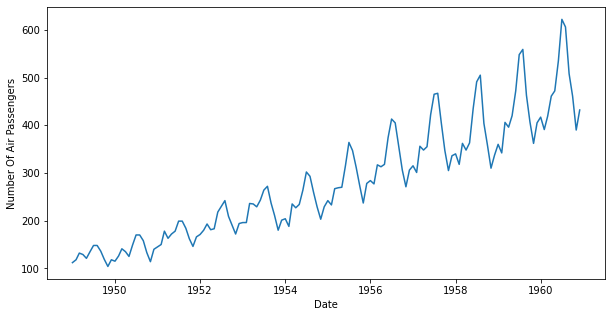

In [ ]:
# S1.6: Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Date')
plt.ylabel('Number Of Air Passengers')
plt.plot(airpass_in_df)
plt.show()

The next step is to test for **stationarity**. From the above plot, it is clearly visible that the series is not stationary since there is an upward trend. Also, the plot exhibits certain repeating patterns thereby indicating the presence of **seasonality**.

Let us confirm whether the dataset is stationary or not by implementing ADF test.



In [ ]:
# S1.7: Implement ADF test.
# Import 'adfuller' from 'sklearn.tsa.tools'
from statsmodels.tsa.stattools import adfuller

# Get the results of Dickey Fuller Test using 'adfuller()' function on indexed DataFrame
print('Results of Dickey Fuller Test:')
adf_df1 = adfuller(airpass_in_df['#Passengers'])

# Print the ADF Statistic results from the first index of ADF Test results
print('ADF Statistic:', adf_df1[0])

# Print the p-value from the second index of ADF Test results
print('p-value: ', adf_df1[1])

Results of Dickey Fuller Test:
ADF Statistic: 0.8153688792060418
p-value:  0.9918802434376409


You may observe that the ADF statistic is not a large negative number and the p-value is greater than 0.05. Therefore, our time series is not stationary and we must apply transformations to make it stationary.

In order to make our series stationary, we will try to stabilise the trend by applying a first-order differencing using `diff(1)` function of pandas DataFrame.

In [ ]:
# S1.8: Use 'diff(1)' function to perform first-order differencing
airpass_diff1 = airpass_in_df.diff(1)
airpass_diff1

,#Passengers
Year-Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


Again check whether the first-order differenced data is stationary or not by performing ADF test. Also, remove `NaN` values from the differenced dataset.

In [ ]:
# S1.9: Remove NaN values and check stationarity of the time series data
airpass_diff1.dropna(inplace = True)

# Get the results of Dickey Fuller Test using 'adfuller()' function on the differenced dataframe
adf_df2 = adfuller(airpass_diff1['#Passengers'])

# Print the ADF Statistic results from the first index of ADF Test results
print('ADF Statistic:', adf_df2[0])

# Print the p-value from the second index of ADF Test results
print('p-value: ', adf_df2[1])

ADF Statistic: -2.829266824169997
p-value:  0.05421329028382577


You may observe that now the ADF statistic is a negative number. However, p-value is equal to 0.05 and not less than 0.05, which means the first-order differenced data is accepting the null hypothesis, indicating that the data is still non-stationary.

Let us perform second-order differencing to further stabilise the trend by using `diff(1)` function with the differenced DataFrame.


In [ ]:
# S1.10: Use 'diff(1)' function to perform second-order differencing on differenced DataFrame.
airpass_diff2 = airpass_diff1.diff(1)
airpass_diff2

,#Passengers
Year-Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


Again check whether the second-order differenced data is stationary or not by performing ADF test. Also, remove `NaN` values from the differenced dataset.

In [ ]:
# S1.11: Remove NaN values and check stationarity of the time series data
airpass_diff2.dropna(inplace = True)

# Get the results of Dickey Fuller Test using 'adfuller()' function on the 2nd differenced dataframe
adf_df3 = adfuller(airpass_diff2['#Passengers'])

# Print the ADF Statistic results from the first index of ADF Test results
print('ADF Statistic:', adf_df3[0])

# Print the p-value from the second index of ADF Test results
print('p-value: ', adf_df3[1])

ADF Statistic: -16.384231542468513
p-value:  2.7328918500142026e-29


Hence, you may observe that we obtained a very less p-value and better ADF statistic value as compared to the previous results, thereby confirming that the second-order differenced data is indeed stationary.

Thus, the value of hyperparameter `d` for ARIMA model is `2`. Next, we need to figure out values of other hyperparameters i.e `p` and `q`.

Before that, let us learn few more evaluation metrics other than Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for time series forecasting.

---

#### Activity 2: Accuracy Metrics for Time Series Forecast

The two widely used accuracy metrics other than RMSE and MAE  for judging forecast performance are:
1. Mean Absolute Percentage Error (MAPE)
2. Akaike Information Criterion (AIC)

**1. Mean Absolute Percentage Error (MAPE)**

- MAPE is used to estimate the accuracy in terms of the differences in the actual v/s predicted values.
- MAPE is calculated as:

\begin{align}
\text{MAPE} & = \frac{1}{n}\sum^{n}_{t=1} \bigg | \frac{A_t - F_t}{A_t} \bigg |
\end{align}

&emsp;&ensp;Where,
 - $n$ is the number of observations.
 - $A_t$ is the actual value at time $t$.
 - $F_t$ is the forecast/predicted value at time $t$.

MAPE is usually expressed in terms of percentage. Lower the MAPE, better fit is the model.

Let us create a user-defined function to calculate MAPE using the Python `numpy` module. We will use this function later in the upcoming activity to calculate MAPE value for Air passenger dataset.




In [ ]:
# S2.1: Define a function to calculate MAPE.
def calculate_mape(y_actual, y_predicted):
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual)) * 100
  return mape

**2. Akaike Information Criterion (AIC)**

- AIC is a single number score that is used to determine which model is the best model out of  multiple models for a given dataset.
- AIC scores are only useful in comparison with other AIC scores for the same dataset.
- AIC measures the information loss, so the **model with a lower AIC score indicates a better fit**.
- It is calculated using the formula:

\begin{align}
\text{AIC} & = n \times \text{log(MSE)} + 2k
\end{align}

Where,
 - $n$: Number of observations.
 - $\text{log(MSE)}$: Log of Mean Squared Error.
 - $k$: Number of features. In our case, there is only 1 feature i.e `#Passengers`. Thus, $k = 1$.

A handy way to calculate AIC score for a model is to use `aic` attribute of `ARIMA` object. We will use this attribute in the upcoming section.

Let us now estimate hyperparameter values for ARIMA and also explore an alternative approach that can be used for estimating these values.

---

#### Activity 3: Estimating Hyperparameter Values of ARIMA

Recall the rule for estimating values of order `p` and `q`:
- To estimate order `p`, Partial Autocorrelation Function (PACF) plot is used.
- To estimate order `q`, Autocorrelation Function (ACF) plot is used.

Let us first create a PACF plot for second-order differenced time-series to estimate order `p`.

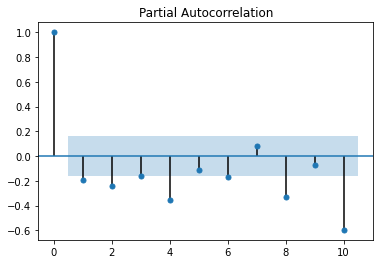

In [ ]:
# S3.1: Plot PACF
plot_pacf(airpass_diff2, lags = 10)
plt.show()

You may observe that there are significant  spikes at lag 1, lag 2 and so on. Thus, let us assume the value of order `p` as `2`.

Similarly, create an ACF plot for second-order differenced time-series to estimate order `q`.


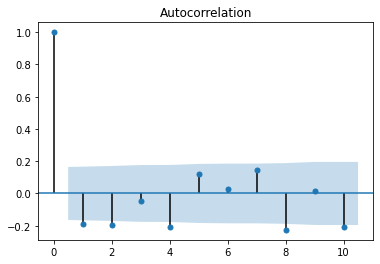

In [ ]:
# S3.2: Plot ACF
plot_acf(airpass_diff2, lags = 10)
plt.show()

Again there are significant spikes at lag 1, 2, 4 and so on. We will choose lag `2`, thus order `q = 2`.

**Note:** You may also pick other significant `p` and `q` values and deploy the model using those values.

Using ACF and PACF plots to estimate hyperparameter values require careful analysis and domain expertise. It can be tricky and confusing.

An alternative approach to finding optimal hyperparameter values without using ACF and PACF plots is to automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a **Grid search** or **model tuning**.

<br/>

**Grid Searching Method:**

In this technique, we will simply iterate through a grid of `p`, `d`, and `q` ARIMA parameters and evaluate model performance for each set of parameters using AIC values.

Let us first define a grid of three variables `p`, `d`, and `q`, where `p` and `q` range from `0` to `4` and `d` range from `0` to `2`.

**Note:** `p` and `q` parameters need not necessarily range till `5`. You can iterate it till `10` or more, in that case the code cell will take more time for execution. The value of `d` normally never exceeds `2` for ARIMA.

In [ ]:
# S3.3: Initiate 'p', 'd', and 'q' parameter grid.
p = range(0, 5)
q = range(0, 5)
d = range(0, 3)

Now we need multiple combinations of `(p, d, q)` values like: `(0, 0, 0)`, `(0, 0, 1)`, `(0, 0, 2)` $\dots$ `,(4, 2, 3)`, `(4, 2, 4)`

This looks like the Cartesian product of `p`, `d`, and `q` variables.

To obtain such combination of values, use `product()` function of `itertools` module which finds the cartesian product from the given iterator.

**Note:** Python **`itertools`** is a library in Python which consists of multiple methods that are used in various iterators to compute a fast and code efficient solution.

In [ ]:
# T3.1: Create combinations of 'p', 'd' and 'q' values.
import itertools
pdq_combination = list(itertools.product(p, d, q)) # return the list of all the computed tuple
print(pdq_combination)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


Now that we have obtained all possible combinations of `p`, `d` and `q` parameter values, let us build ARIMA model for each set of parameter values and determine the AIC score of each model. Also, check which set of parameter values returns the lowest AIC score.

Follow the steps given below to perform Grid search hyperparameter tuning for ARIMA:

1. Import `ARIMA` class from `statsmodels.tsa.arima_model` module.

2. Initialise two variables `lowest_aic` and `best_params` to `float("inf")` and `None` respectively. The `float("inf")` will set the variable with an infinitely large value. Here,
  - The `lowest_aic` variable will store the lowest AIC score obtained out of all AIC scores.
  - The `best_params` variable will store the `(p, d, q)` values for which the model AIC score is the lowest.

3. Initiate a `for` loop that iterates through every combination of `(p, d, q)` values stored in `pdq_combination` variable. Inside this `for` loop,
 - Add a `try` block and `except` block to catch and handle some errors/exceptions that might result from different hyperparameter values. We need not study in detail the use of these error handling blocks.

 - Inside the `try` block, create an object of `ARIMA` class and pass the following inputs:
    - `airpass_in_df`:  The original indexed DataFrame. You can also perform train-test split and train the model using train set.
    - `order = pdq`: Each combination of hyperparameter values from `pdq_combination`.

 - Call the `fit()` function using the object of `ARIMA`.

 - Determine the AIC score of the current model using `aic` attribute of `ARIMA` object and store this value in a `aic_m` variable . Print the  hyperparameter values and the AIC score of the current instance model.

 - Compare `aic_m` and `lowest_aic` values.
    - If  `aic_m < lowest_aic`, then store current AIC i.e `aic_m` value in `lowest_aic` variable and current order i.e `pdq` value in `best_params` variable.
  
  In this way, for every iteration, an ARIMA model is created for a set of hyperparameter values and then the AIC score for that model is determined. If that AIC score is less than the last lowest AIC score, then replace the lowest AIC score with the current AIC score.

4. Finally, print the best hyperparameter values exhibiting lowest AIC score by printing `best_params` and `lowest_aic` variables.



**Note:** This execution will generate a lot of unnecessary warnings. To remove these warnings, add the following code to the below code cell.

```python
import warnings
warnings.filterwarnings("ignore")
```

In [ ]:
# T3.2: Perform Grid search Hyperparameter tuning for ARIMA
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA

lowest_aic, best_params = float("inf"), None

for pdq in pdq_combination:
  try:
    model = ARIMA(airpass_in_df, order = pdq).fit()
    aic_m = model.aic

    print(f'ARIMA{pdq} AIC={aic_m:.3f}')
    if aic_m < lowest_aic:
      lowest_aic, best_params = aic_m, pdq

  except:
    continue

print(f'Best ARIMA {best_params} AIC={lowest_aic:.3f}')

ARIMA(0, 0, 0) AIC=1790.368
ARIMA(0, 0, 1) AIC=1618.863
ARIMA(0, 1, 0) AIC=1415.278
ARIMA(0, 1, 1) AIC=1398.827
ARIMA(0, 1, 2) AIC=1398.386
ARIMA(0, 1, 3) AIC=1381.664
ARIMA(0, 1, 4) AIC=1357.315
ARIMA(0, 2, 0) AIC=1452.590
ARIMA(0, 2, 1) AIC=1413.363
ARIMA(0, 2, 2) AIC=1396.372
ARIMA(0, 2, 3) AIC=1396.408
ARIMA(1, 0, 0) AIC=1428.179
ARIMA(1, 0, 1) AIC=1409.748
ARIMA(1, 0, 2) AIC=1411.050
ARIMA(1, 0, 3) AIC=1420.734
ARIMA(1, 0, 4) AIC=2360.428
ARIMA(1, 1, 0) AIC=1403.473
ARIMA(1, 1, 1) AIC=1402.145
ARIMA(1, 1, 2) AIC=1371.815
ARIMA(1, 1, 3) AIC=1373.076
ARIMA(1, 1, 4) AIC=1359.167
ARIMA(1, 2, 0) AIC=1449.026
ARIMA(1, 2, 2) AIC=1393.908
ARIMA(1, 2, 3) AIC=1394.467
ARIMA(1, 2, 4) AIC=1396.217
ARIMA(2, 0, 0) AIC=1413.639
ARIMA(2, 0, 1) AIC=1408.249
ARIMA(2, 0, 2) AIC=1464.437
ARIMA(2, 0, 3) AIC=1430.704
ARIMA(2, 0, 4) AIC=2587.983
ARIMA(2, 1, 0) AIC=1397.975
ARIMA(2, 1, 1) AIC=1361.696
ARIMA(2, 1, 2) AIC=1344.043
ARIMA(2, 1, 3) AIC=1343.278
ARIMA(2, 1, 4) AIC=1338.585
ARIMA(2, 2, 0) AIC=1

Running the above code cell prints the ARIMA parameters and AIC score for each set of parameters. Also, the lowest AIC value of 1332.955 was obtained for the ARIMA(4, 1, 4) model, and that will be used as the final estimator.

We are now ready to deploy ARIMA(p, d, q) model using `statsmodels` package with optimal hyperparameter values obtained from the above Grid search using the steps given below:

1. Create an object of `ARIMA` class and pass the following inputs:
  - `airpass_in_df`:  The original indexed DataFrame.
  - `order = (4, 1, 4)`: The hyperparameter values obtained from Grid search technique.

3. Call the `fit()` function using the object of `ARIMA`.
4. Print the AIC score of the ARIMA model using `aic` attribute.


In [ ]:
# S3.4: Build ARIMA model with optimal order values for entire dataset.
arima_1 = ARIMA(airpass_in_df, order = (4, 1, 4)).fit()
arima_1.aic

1332.9549969619318

Let us now perform prediction using `predict()` function by specifying the start and end index for differenced dataset. Also, plot the predictions.

**Note:** Use `typ = 'levels'` attribute within `predict()` function to perform prediction for original observations rather than differenced observations.

Evaluate this model using accuracy metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Also calculate the Mean Absolute Percentage Error (MAPE) value by calling `calculate_mape()` function (This function was already defined in **Activity 2: Accuracy Metrics for Time Series Forecast**).

MAE: 18.246955384784968
RMSE: 23.282991464973207
MAPE: 6.762105744000019


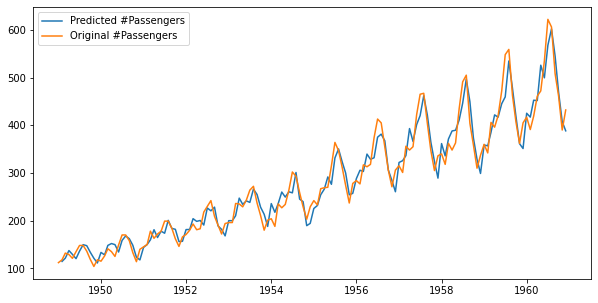

In [ ]:
# S3.5: Perform prediction using 'predict()' function for original dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict using `predict()` function with start = 1 and end = (total observations - 1)
pred = arima_1.predict(1, len(airpass_in_df) - 1, typ = 'levels')

# Print MAE, RMSE, MAPE values
print("MAE:", mean_absolute_error(airpass_in_df[1:], pred))
print("RMSE:", np.sqrt(mean_squared_error(airpass_in_df[1:], pred)))

print("MAPE:", calculate_mape(airpass_in_df['#Passengers'].iloc[1:], pred))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted #Passengers')
plt.plot(airpass_in_df['#Passengers'], label = 'Original #Passengers')
plt.legend()
plt.show()

From above plot, we can see that our predicted forecasts are close to the real time series values. The MAE, RMSE and MAPE values are moderately high. Thus, it indicates a fairly accurate model.

**Forecasting Future:**

Let us forecast future values using this ARIMA model by applying `predict()` function.

We have 144 (existing data of 12 years in months) data points. Now, we want to forecast for additional 10 yrs (i.e $10 \times 12 \text{ months} = 120$ data points).

Thus, the start index for `predict()` function would be $144$ and end index would be $144 + 120 = 264$ records/data points.

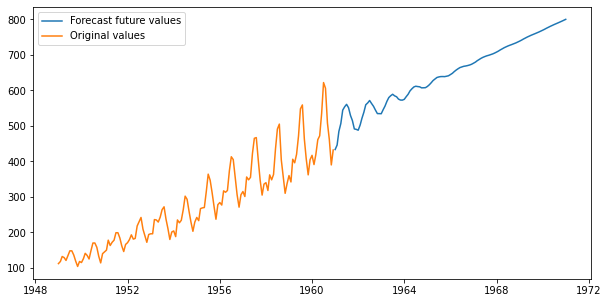

In [ ]:
# S3.6: Perform prediction for new values. Plot the forecast values
arima_forecast = arima_1.predict(start = 144, end = 264, typ = 'levels')
plt.figure(figsize=(10, 5))
plt.plot(arima_forecast, label = 'Forecast future values')
plt.plot(airpass_in_df['#Passengers'], label = 'Original values')
plt.legend()
plt.show()

From the above plot we can conclude that this ARIMA model is able to capture the upward trend but is not able to capture the **Seasonality** of the time series data.

To incorporate the effect of seasonality in time series, we will use another time series forecasting model called as **Seasonal ARIMA** or **SARIMA**.

We will stop here. In the next class, we will implement SARIMA model on Air passenger dataset and determine whether it is able to capture seasonality of the time-series data.

---

#### Activities


**Teacher Activities:**

1.   ARIMA V - Grid Search ARIMA (Class Copy)

	Link on Panel

2.  ARIMA V - Grid Search ARIMA (Reference)

	https://colab.research.google.com/drive/1Y6bRLcvyrfdnUNEXlsSppW56X_7fPQZy

---